### Processing data

In [1]:
import re

import pandas as pd
import nltk

In [2]:
# read in comments
comments = pd.read_csv('./data/raw/Comments.csv')

In [3]:
sample = comments.Reply.iloc[9]
sample

'"How about a pilot without the plane?"\n\nIron-Man, confirmed.'

In [4]:
re.sub(r'\(?http\S+', '', sample)

'"How about a pilot without the plane?"\n\nIron-Man, confirmed.'

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelchung/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
sample = comments.Reply.iloc[9]
sample

'How about a pilot without the plane\n\nIronMan confirmed'

In [41]:
word_tokenized = nltk.word_tokenize(sample)
word_tokenized

['How',
 'about',
 'a',
 'pilot',
 'without',
 'the',
 'plane',
 'IronMan',
 'confirmed']

In [42]:
' '.join(word_tokenized)

'How about a pilot without the plane IronMan confirmed'

**Bigrams**

In [43]:
sample = ['more', 'is', 'said', 'than', 'done', 'is', 'said', 'than']

In [44]:
from nltk.collocations import *

In [45]:
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [46]:
all_text = nltk.word_tokenize(all_text)

In [47]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10))

[('Acronyms', 'initialisms'), ('LettersMore', 'Letters'), ('abbreviations', 'contractions'), ('initialisms', 'abbreviations'), ('Fewer', 'LettersMore'), ('fossil', 'fuels'), ('FAQ', 'Full'), ('vast', 'majority'), ('009', '009'), ('list', 'Contact')]


In [49]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [50]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

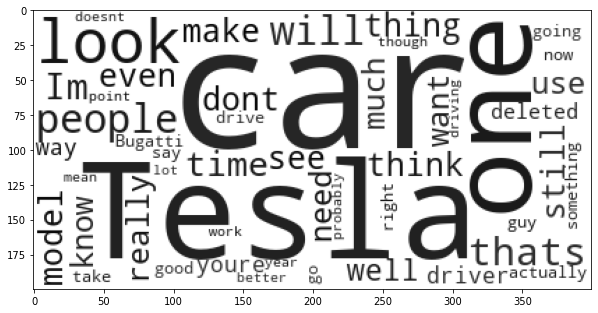

In [51]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()